<a href="https://colab.research.google.com/github/nineJJ9/heejuzzang/blob/master/Movie_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#경고 메시지 표시 안함
import warnings
warnings.filterwarnings(action ='ignore')

import pandas as pd

In [ ]:
nsmc_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings_train.txt',encoding = 'utf8', sep = '\t',engine='python')

nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
#결측치 제거
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]

In [ ]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
#document가 notnull인 행만 train_df 에 저장
nsmc_train_df['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [ ]:
#한글 외 문자 제거
import re

In [ ]:
nsmc_train_df['documnet']=nsmc_train_df['document'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+'," ",x))
nsmc_train_df.head()

,id,document,label,documnet
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 없다 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...


In [ ]:
#평가용 데이터 준비
nsmc_test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings_test.txt',encoding = 'utf8', sep = '\t',engine='python')
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
#document 칼럼이 Null인 샘플 제거
nsmc_test_df = nsmc_test_df[nsmc_test_df['document'].notnull()]

In [ ]:
nsmc_test_df['label'].value_counts()

1    25171
0    24826
Name: label, dtype: int64

In [ ]:
nsmc_test_df['document']=nsmc_test_df['document'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+'," ",x))

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu b

In [ ]:
#특정 벡터화 작업
from konlpy.tag import Okt

okt = Okt()

In [ ]:
def okt_tokenizer(text):
    tokens=okt.morphs(text)
    return tokens

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf.fit(nsmc_train_df['document'])
nsmc_train_tfidf = tfidf.transform(nsmc_train_df['document'])

In [ ]:
from sklearn.linear_model import LogisticRegression

SA_lr=LogisticRegression(random_state=0)

In [ ]:
SA_lr.fit(nsmc_train_tfidf,nsmc_train_df['label'])

LogisticRegression(random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'C':[1,3,3.5,4,4.5,5]}
SA_lr_grid_cv=GridSearchCV(SA_lr,param_grid=params,cv=3,scoring='accuracy',verbose=1)

In [ ]:
SA_lr_grid_cv.fit(nsmc_train_tfidf,nsmc_train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [ ]:
print(SA_lr_grid_cv.best_params_,round(SA_lr_grid_cv.best_score_,4))

{'C': 3} 0.8631


In [ ]:
#최적 매개변수의 best 모델 저장
SA_lr_best=SA_lr_grid_cv.best_estimator_

In [ ]:
#평가용 데이터의 피처 벡터화
nsmc_test_tfidf = tfidf.transform(nsmc_test_df['document'])

In [ ]:
test_predict = SA_lr_best.predict(nsmc_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score

print('감정 분석 정확도: ', round(accuracy_score(nsmc_test_df['label'],test_predict),3))

감정 분석 정확도:  0.855


In [ ]:
#새로운 텍스트로 감정분석
st = input('감성 분석할 문장입력 >> ')

감성 분석할 문장입력 >> 이 영화 좀 별론데?


In [ ]:
#0) 입력텍스트의 전처리 실행
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st = [" ".join(st)]
print(st)

['이', '영화', '좀', '별론데']
['이 영화 좀 별론데']


In [ ]:
#1) 입력 텍스트의 피처 벡터화
st_tfidf = tfidf.transform(st)
#2) 최적 감성 분석 모델에 적용하여 감성 분석 평가
st_predict = SA_lr_best.predict(st_tfidf)

In [ ]:
#3)예측값 출력하기
if(st_predict== 0):
    print(st , "->> 부정 감성")
else :
    print(st , "->> 긍정 감성")

['이 영화 좀 별론데'] ->> 부정 감성


In [ ]:
import json

file_path = "/content/drive/MyDrive/Colab Notebooks/naver_news.json"

with open(file_path, 'r') as file:
    data = json.load(file)

In [ ]:
print(data)

[{'cnt': 1, 'decription': '에어부산 박진호 홍보팀장은 &quot;<b>일본</b> 노선 <b>여행</b>객이 지속적으로 증가하고 있는 상황에서 최근에는 동남아 노선 <b>여행</b>객의 증가세가 더욱 가파른 상황으로 이에 맞춰 클락 노선을 올해 첫 신규 취항지로 정하게 됐다&quot;며... ', 'link': 'https://www.iusm.co.kr/news/articleView.html?idxno=1006381', 'org_link': 'https://www.iusm.co.kr/news/articleView.html?idxno=1006381', 'pDate': '2023-01-09 22:22:00', 'title': '에어부산, 부산~클락 노선 만석 기록 흥행 &apos;장미빛&apos;'}, {'cnt': 2, 'decription': '이젠 <b>일본</b>을 <b>여행</b>하면서 직접 둘러 보고 싶어요.] 그동안 불투명한 역학 정보로 지적을 받던 중국은 XBB 변이의 진원지로 미국을 지목하며 국제사회에 자료를 공개하라고 역공을 폈습니다. 베이징에서 YTN 강정규입니다.', 'link': 'https://www.ytn.co.kr/_ln/0104_202301092213407349', 'org_link': 'https://www.ytn.co.kr/_ln/0104_202301092213407349', 'pDate': '2023-01-09 22:13:00', 'title': '中 &quot;허난성 농촌까지 90% 감염&quot;...여권 발급 긴 줄'}, {'cnt': 3, 'decription': '있는 <b>일본</b> 됴코의 맛집을 가족과 함께 다시 찾았다. 맛있는 음식을 먹고 문방구도 들렀다. 음식을 먹던 강수정은 방송 때문에 젓가락질 하는 법을 고쳤다고 밝혔따. 8일 강수정의 유튜브 채널에는 &apos;맛있는 도쿄 미식<b>여행</b>... ', 'link': 'https://tenasia.hankyung.com/tv/arti

In [ ]:
data_title = []

In [ ]:
data_description = []

In [ ]:
for item in data:
  data_title.append(item['title'])
  data_description.append(item['decription'])

In [ ]:
len(data_title)

1000

In [ ]:
len(data_description)

1000

In [ ]:
data_title

['에어부산, 부산~클락 노선 만석 기록 흥행 &apos;장미빛&apos;',
 '中 &quot;허난성 농촌까지 90% 감염&quot;...여권 발급 긴 줄',
 '[종합] &apos;홍콩댁&apos; 강수정 &quot;욕먹기 싫어서 젓가락질 교정&quot;…46년 된 가게에 &quot;내...',
 '&apos;46세&apos; 강수정, 46년 된 日문방구에 &quot;동갑이었구나! 아니다, 언니네&quot; 말 바꾸...',
 '강수정, ♥홍콩 금융맨 남편 애칭은 &quot;오빠&quot;…&quot;먹고 있어?&quot; 아들 챙기는 남편 ...',
 '&apos;생활의 달인&apos; 오사카 고기 찐빵·전국 8도 6대 김밥·광명 국화빵',
 '&apos;생활의 달인&apos; 인천 물만두 칼국수-오사카 고기 찐빵-중국 란저우 우육면-광명...',
 '전현무, 자신 빠진 미담 속출에 김숙과 통큰 회식비 지출…셀프 미담 제조 (톡...',
 '<b>일본</b> 고기 찐빵 달인, 하루 5000개 파는 오사카 위치 핫플레이스',
 '&apos;생활의 달인&apos; 국화빵 달인→오사카 고기 찐빵 달인 &quot;감탄&quot;',
 '[촉석루] 가족 첫 해외<b>여행</b>- 김용만(김해 금곡고 교사)',
 '이찬원 신발 선물ㆍ김숙 배달 쿠폰에 감동한 양세찬 &quot;현무 형 시계주세요&quot;(톡...',
 '&apos;톡파원 25시&apos; 미국·호주 랜드마크→나고야 된장 투어 [Ce:스포]',
 '&apos;생활의달인&apos; 고기 찐빵·여주 매운 우엉 김밥·광명시장 국화빵',
 '크루즈 관광 재개, 속초항에 외국관광객 온다',
 '&apos;생활의 달인 가게위치&apos; 오사카 고기찐빵·6대 김밥·국화빵 달인 소개',
 '전현무, 미담 없으면 만들면 되지…통 큰 회식비 (톡파원25시)',
 '&apos;12세 연상♥&apos; 기은세, 상체만한 명품 C사 가방 들고 &apos;입술 쭉&apos;',
 '&apos;톡파원 25시&apos; 이찬원

In [ ]:
data_description

['에어부산 박진호 홍보팀장은 &quot;<b>일본</b> 노선 <b>여행</b>객이 지속적으로 증가하고 있는 상황에서 최근에는 동남아 노선 <b>여행</b>객의 증가세가 더욱 가파른 상황으로 이에 맞춰 클락 노선을 올해 첫 신규 취항지로 정하게 됐다&quot;며... ',
 '이젠 <b>일본</b>을 <b>여행</b>하면서 직접 둘러 보고 싶어요.] 그동안 불투명한 역학 정보로 지적을 받던 중국은 XBB 변이의 진원지로 미국을 지목하며 국제사회에 자료를 공개하라고 역공을 폈습니다. 베이징에서 YTN 강정규입니다.',
 '있는 <b>일본</b> 됴코의 맛집을 가족과 함께 다시 찾았다. 맛있는 음식을 먹고 문방구도 들렀다. 음식을 먹던 강수정은 방송 때문에 젓가락질 하는 법을 고쳤다고 밝혔따. 8일 강수정의 유튜브 채널에는 &apos;맛있는 도쿄 미식<b>여행</b>... ',
 '8일 강수정의 유튜브 채널에는 &apos;맛있는 도쿄 미식<b>여행</b> / 샤브샤브 vs 스키야키&apos;라는 제목의 영상이 올라왔다. 강수정은 남편과 추억이 있는 <b>일본</b> 도쿄의 식당들을 찾았다. 샤브샤브를 먹은 강수정은 만족스러워했다.... ',
 '방송인 강수정이 남편과 추억이 있는 <b>일본</b> 됴코의 맛집을 다시 찾았다. 8일 강수정의 유튜브 채널에는 &apos;맛있는 도쿄 미식<b>여행</b> / 샤브샤브 vs 스키야키&apos;라는 제목의 영상이 공개됐다. 강수정은 남편과 추억이 있는 도쿄의... ',
 '올해 해외에서 만난 첫 주인공은 바로 <b>일본</b> 오사카의 시게미츠 료헤이 (男 / 34세 / 경력 10년) 달인. 최근 한국인의 해외 <b>여행</b>지로 핫한 오사카에서도 하루 판매량만 무려 5000개에 달하는 오사카 명물을 직접 만드는데... ',
 '올해 해외에서 만난 첫 주인공은 바로 <b>일본</b> 오사카의 시게미츠 료헤이 (男 / 34세 / 경력 10년) 달인. 최근 한국인의 해외 <b>여행</b>지로 핫한 오사카에서도 하루 판매량만

In [ ]:
#data_description.pop(0)

In [ ]:
data_df = pd.DataFrame({'title': data_title, 'description': data_description})

In [ ]:
data_df['title'] = data_df['title'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣+]+', " ", x))

In [ ]:
data_df.head()

,title,description
0,에어부산 부산 클락 노선 만석 기록 흥행 장미빛,에어부산 박진호 홍보팀장은 &quot;<b>일본</b> 노선 <b>여행</b>객이 ...
1,허난성 농촌까지 감염 여권 발급 긴 줄,이젠 <b>일본</b>을 <b>여행</b>하면서 직접 둘러 보고 싶어요.] 그동안 ...
2,종합 홍콩댁 강수정 욕먹기 싫어서 젓가락질 교정 년 된 가게에 내,있는 <b>일본</b> 됴코의 맛집을 가족과 함께 다시 찾았다. 맛있는 음식을 먹고...
3,세 강수정 년 된 문방구에 동갑이었구나 아니다 언니네 말 바꾸,8일 강수정의 유튜브 채널에는 &apos;맛있는 도쿄 미식<b>여행</b> / 샤브...
4,강수정 홍콩 금융맨 남편 애칭은 오빠 먹고 있어 아들 챙기는 남편,방송인 강수정이 남편과 추억이 있는 <b>일본</b> 됴코의 맛집을 다시 찾았다. ...


In [ ]:
data_title_tfidf = tfidf.transform(data_df['title'])

In [ ]:
data_title_predict = SA_lr_best.predict(data_title_tfidf)

In [ ]:
data_df['title_label'] = data_title_predict

In [ ]:
data_description_tfidf = tfidf.transform(data_df['description'])

In [ ]:
data_description_predict = SA_lr_best.predict(data_description_tfidf)

In [ ]:
data_df['description_label'] = data_description_predict

In [ ]:
data_df.to_csv('./naver_news_감성분석결과.csv')

In [ ]:
data_df.head()

,title,description,title_label,description_label
0,에어부산 부산 클락 노선 만석 기록 흥행 장미빛,에어부산 박진호 홍보팀장은 &quot;<b>일본</b> 노선 <b>여행</b>객이 ...,1,1
1,허난성 농촌까지 감염 여권 발급 긴 줄,이젠 <b>일본</b>을 <b>여행</b>하면서 직접 둘러 보고 싶어요.] 그동안 ...,1,1
2,종합 홍콩댁 강수정 욕먹기 싫어서 젓가락질 교정 년 된 가게에 내,있는 <b>일본</b> 됴코의 맛집을 가족과 함께 다시 찾았다. 맛있는 음식을 먹고...,0,1
3,세 강수정 년 된 문방구에 동갑이었구나 아니다 언니네 말 바꾸,8일 강수정의 유튜브 채널에는 &apos;맛있는 도쿄 미식<b>여행</b> / 샤브...,0,1
4,강수정 홍콩 금융맨 남편 애칭은 오빠 먹고 있어 아들 챙기는 남편,방송인 강수정이 남편과 추억이 있는 <b>일본</b> 됴코의 맛집을 다시 찾았다. ...,0,1


In [ ]:
print(data_df['title_label'].value_counts())

0    628
1    372
Name: title_label, dtype: int64


In [ ]:
print(data_df['description_label'].value_counts())

1    603
0    397
Name: description_label, dtype: int64


In [ ]:
columns_name = ['title', 'title_label', 'description', 'description_label']

In [ ]:
NEG_data_df = pd.DataFrame(columns = columns_name)

In [ ]:
POS_data_df = pd.DataFrame(columns = columns_name)

In [ ]:
for i, data in data_df.iterrows():
  title = data["title"]
  description = data["description"]
  t_label = data["title_label"]
  d_label = data["description_label"]

  if d_label == 0:
    NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]], columns = columns_name), ignore_index = True)
  else:
    POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]], columns = columns_name), ignore_index = True)

In [ ]:
NEG_data_df.to_csv('./NES_감성분석결과.csv')
POS_data_df.to_csv('./POS_감성분석결과.csv')

In [ ]:
len(NEG_data_df)

397

In [ ]:
len(POS_data_df)

603

In [ ]:
POS_description = POS_data_df['description']

In [ ]:
POS_description_noun_tk = []

for d in POS_description:
  POS_description_noun_tk.append(okt.nouns(d))

In [ ]:
print(POS_description_noun_tk)

[['에어부산', '박진호', '홍보팀', '일본', '노선', '여행', '객', '지속', '증가', '상황', '최근', '동남아', '노선', '여행', '객', '증가', '세', '더욱', '가파른', '상황', '이', '클락', '노선', '올해', '첫', '신규', '취항', '지로', '정', '며'], ['젠', '일본', '여행', '직접', '보고', '그동안', '역학', '정보', '지적', '중국', '변', '이의', '진원', '지로', '미국', '지목', '국제사회', '자료', '공개', '역공', '베이징', '강', '정규'], ['일본', '됴코', '맛집', '가족', '다시', '음식', '문방구', '음식', '강수정', '방송', '때문', '젓가락', '질', '법', '강수정', '유튜브', '채널', '도쿄', '미식', '여행'], ['강수정', '유튜브', '채널', '도쿄', '미식', '여행', '샤브샤브', '스키야키', '제목', '영상', '강수정', '남편', '추억', '일본', '도쿄', '식당', '샤브샤브', '강수정'], ['방송인', '강수정', '남편', '추억', '일본', '됴코', '맛집', '다시', '강수정', '유튜브', '채널', '도쿄', '미식', '여행', '샤브샤브', '스키야키', '제목', '영상', '공개', '강수정', '남편', '추억', '도쿄'], ['올해', '해외', '만난', '첫', '주인공', '바로', '일본', '오사카', '시게미츠', '료헤이', '세', '경력', '달인', '최근', '한국인', '해외', '여행', '지로', '핫', '오사카', '하루', '판매량', '무려', '개', '달', '오사카', '명물', '직접'], ['올해', '해외', '만난', '첫', '주인공', '바로', '일본', '오사카', '시게미츠', '료헤이', '세', '경력', '달인', '최근', '한국인', '해외', '여행', '지

In [ ]:
POS_description_noun_join = []

for d in POS_description_noun_tk:
  d2 = [w for w in d if len(w) > 1]
  POS_description_noun_join.append(" ".join(d2))

In [ ]:
print(POS_description_noun_join)

['에어부산 박진호 홍보팀 일본 노선 여행 지속 증가 상황 최근 동남아 노선 여행 증가 더욱 가파른 상황 클락 노선 올해 신규 취항 지로', '일본 여행 직접 보고 그동안 역학 정보 지적 중국 이의 진원 지로 미국 지목 국제사회 자료 공개 역공 베이징 정규', '일본 됴코 맛집 가족 다시 음식 문방구 음식 강수정 방송 때문 젓가락 강수정 유튜브 채널 도쿄 미식 여행', '강수정 유튜브 채널 도쿄 미식 여행 샤브샤브 스키야키 제목 영상 강수정 남편 추억 일본 도쿄 식당 샤브샤브 강수정', '방송인 강수정 남편 추억 일본 됴코 맛집 다시 강수정 유튜브 채널 도쿄 미식 여행 샤브샤브 스키야키 제목 영상 공개 강수정 남편 추억 도쿄', '올해 해외 만난 주인공 바로 일본 오사카 시게미츠 료헤이 경력 달인 최근 한국인 해외 여행 지로 오사카 하루 판매량 무려 오사카 명물 직접', '올해 해외 만난 주인공 바로 일본 오사카 시게미츠 료헤이 경력 달인 최근 한국인 해외 여행 지로 오사카 하루 판매량 무려 오사카 명물 직접', '톡파 여행 욕구 침샘 자극 랜선 여행 예고 전현무 크게 회식비 일본 실력 김종현 타쿠야 일본 어로 전현무 칭찬 시간', '방송 생활 달인 일본 오사카 시게미츠 료헤이 달인 최근 한국인 해외 여행 지로 오사카 하루 판매량 무려 오사카 명물 고기 찐빵 직접', '또한 일본 오사카 시게미츠 료헤이 경력 달인 최근 한국인 해외 여행 지로 오사카 하루 판매량 무려 오사카 명물 직접 명물 바로 고기', '위치 오세아니아 과거 스페인 미국 일본 지배 현재 미국 해외 속령 아이 해외 여행 우리 가족', '본격 랜선 여행 앞서 양세찬 생일 선물 취향 저격 신발 선물 이찬원 또한 일본 실력 김종현 타쿠야 일본 어로 전현무 칭찬 시간', '톡파 여행 욕구 침샘 자극 랜선 여행 예고 방송 또한 일본 실력 김종현 타쿠야 일본 어로 전현무 칭찬 시간', '올해 해외 만난 주인공 바로 일본 오사카 시게미츠 료헤이 경력 달인 최근 한국인 해외 여행 지로 오사카 하루 판매량 무려

In [ ]:
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []

for d in NEG_description:
  NEG_description_noun_tk.append(okt.nouns(d))

NEG_description_noun_join = []

for d in NEG_description_noun_tk:
  d2 = [w for w in d if len(w) > 1]
  NEG_description_noun_join.append(" ".join(d2))

In [ ]:
POS_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df = 2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

In [ ]:
POS_vocab = dict()

for idx, word in enumerate(POS_tfidf.get_feature_names()):
  POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key = lambda x: x[1], reverse = True)

In [ ]:
POS_words

[('여행', 41.09464906502264),
 ('일본', 35.73631231523335),
 ('해외', 21.902569781435403),
 ('중국', 21.561248359674565),
 ('한국', 17.67529577775568),
 ('미국', 16.112442844612136),
 ('노선', 14.6036421545361),
 ('베트남', 14.03050783943615),
 ('필리핀', 13.640296105255771),
 ('증가', 13.444593249075563),
 ('오사카', 13.305097162379464),
 ('코로나', 10.961689940806268),
 ('최근', 10.566644191436906),
 ('대한', 10.354177348402319),
 ('입국', 10.32523998155627),
 ('동남아', 9.785937089470151),
 ('상품', 9.696846852065983),
 ('인기', 9.52238220465863),
 ('에스', 9.26317322377224),
 ('공개', 9.166970895854833),
 ('영국', 9.032467673161388),
 ('광양', 8.265843779253519),
 ('통해', 7.786567808662486),
 ('상황', 7.752489443354703),
 ('한국인', 7.732546359436356),
 ('지속', 7.707281814380772),
 ('수요', 7.685623813774906),
 ('국내', 7.5995146284280235),
 ('관련', 7.415978724826182),
 ('패키지', 7.381051381028813),
 ('올해', 7.34762071675811),
 ('회복', 7.248557503511748),
 ('판매', 7.1299306373786955),
 ('주요', 7.1258713606143145),
 ('태국', 7.09245655713931),
 ('호주'

In [ ]:
NEG_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df = 2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

NEG_vocab = dict()

for idx, word in enumerate(NEG_tfidf.get_feature_names()):
  NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key = lambda x: x[1], reverse = True)

NEG_words

[('여행', 26.13553567673846),
 ('일본', 24.33021937378872),
 ('중국', 21.78016505554116),
 ('해외', 15.337433396664562),
 ('동남아', 12.894108173468108),
 ('사업', 12.078559828383858),
 ('코로나', 12.055975823493055),
 ('수요', 11.963834145821341),
 ('입국', 11.762584544187515),
 ('연휴', 11.111941476706953),
 ('노선', 10.958440904544275),
 ('문화', 9.535996043440683),
 ('증가', 9.342269620844),
 ('미국', 9.318083579967285),
 ('하나투어', 9.286006853101226),
 ('유림', 9.241032101831639),
 ('상품', 8.889871433010654),
 ('기준', 8.747486065128083),
 ('한국', 8.660246693659472),
 ('대상', 8.003299945013296),
 ('대만', 7.2972688294193215),
 ('지난해', 7.230912729205555),
 ('새해', 6.667460140789775),
 ('예약', 6.352586075429415),
 ('티웨이항공', 6.333438710293394),
 ('출발', 6.217168767316139),
 ('관계자', 6.10669181923371),
 ('필리핀', 6.035575214558319),
 ('영국', 5.95452569959763),
 ('검사', 5.907255340195258),
 ('베트남', 5.878930786434049),
 ('규제', 5.761781100701154),
 ('최근', 5.704002229973233),
 ('국내선', 5.681846597871105),
 ('관광', 5.595672696189702),
 ('건

In [ ]:
import matplotlib 
matplotlib.font_manager._rebuild()

In [ ]:
max = 15

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontcon

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:

"""
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = '/content/drive/MyDrive/Colab Notebooks/MALGUN.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = NanumBarunGothic)
"""
max = 15 #바 차트에 나타낼 단어의 수


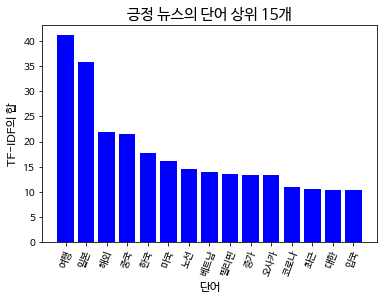

In [ ]:
plt.bar(range(max),[i[1] for i in POS_words[:max]],color = "blue")
plt.title("긍정 뉴스의 단어 상위 %d개" %max, fontsize = 15)
plt.xlabel("단어", fontsize = 12)
plt.ylabel("TF-IDF의 합", fontsize = 12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation = 70)

plt.show()

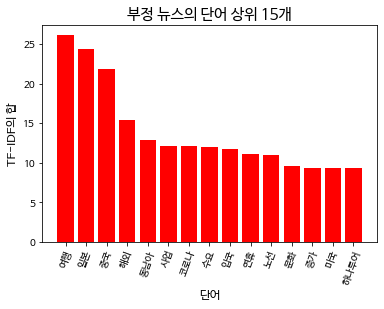

In [ ]:
plt.bar(range(max),[i[1] for i in NEG_words[:max]],color = "red")
plt.title("부정 뉴스의 단어 상위 %d개" %max, fontsize = 15)
plt.xlabel("단어", fontsize = 12)
plt.ylabel("TF-IDF의 합", fontsize = 12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation = 70)

plt.show()